In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from scipy.stats import ks_2samp

In [3]:
# Load your dataset
data_count = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Datasets/GlobalLandTemperaturesByCity.csv', parse_dates=[0])
#print(data_count.head())
data_country = data_count[data_count['Country']=='Germany']

In [4]:
# Total missing values per column
missing_per_column = data_country.isna().sum()

# Total missing values in the entire dataset
total_missing = data_country.isna().sum().sum()

print("Missing values per column:\n", missing_per_column)
print("\nTotal missing values in dataset:", total_missing)

Missing values per column:
 dt                                  0
AverageTemperature               5913
AverageTemperatureUncertainty    5913
City                                0
Country                             0
Latitude                            0
Longitude                           0
dtype: int64

Total missing values in dataset: 11826


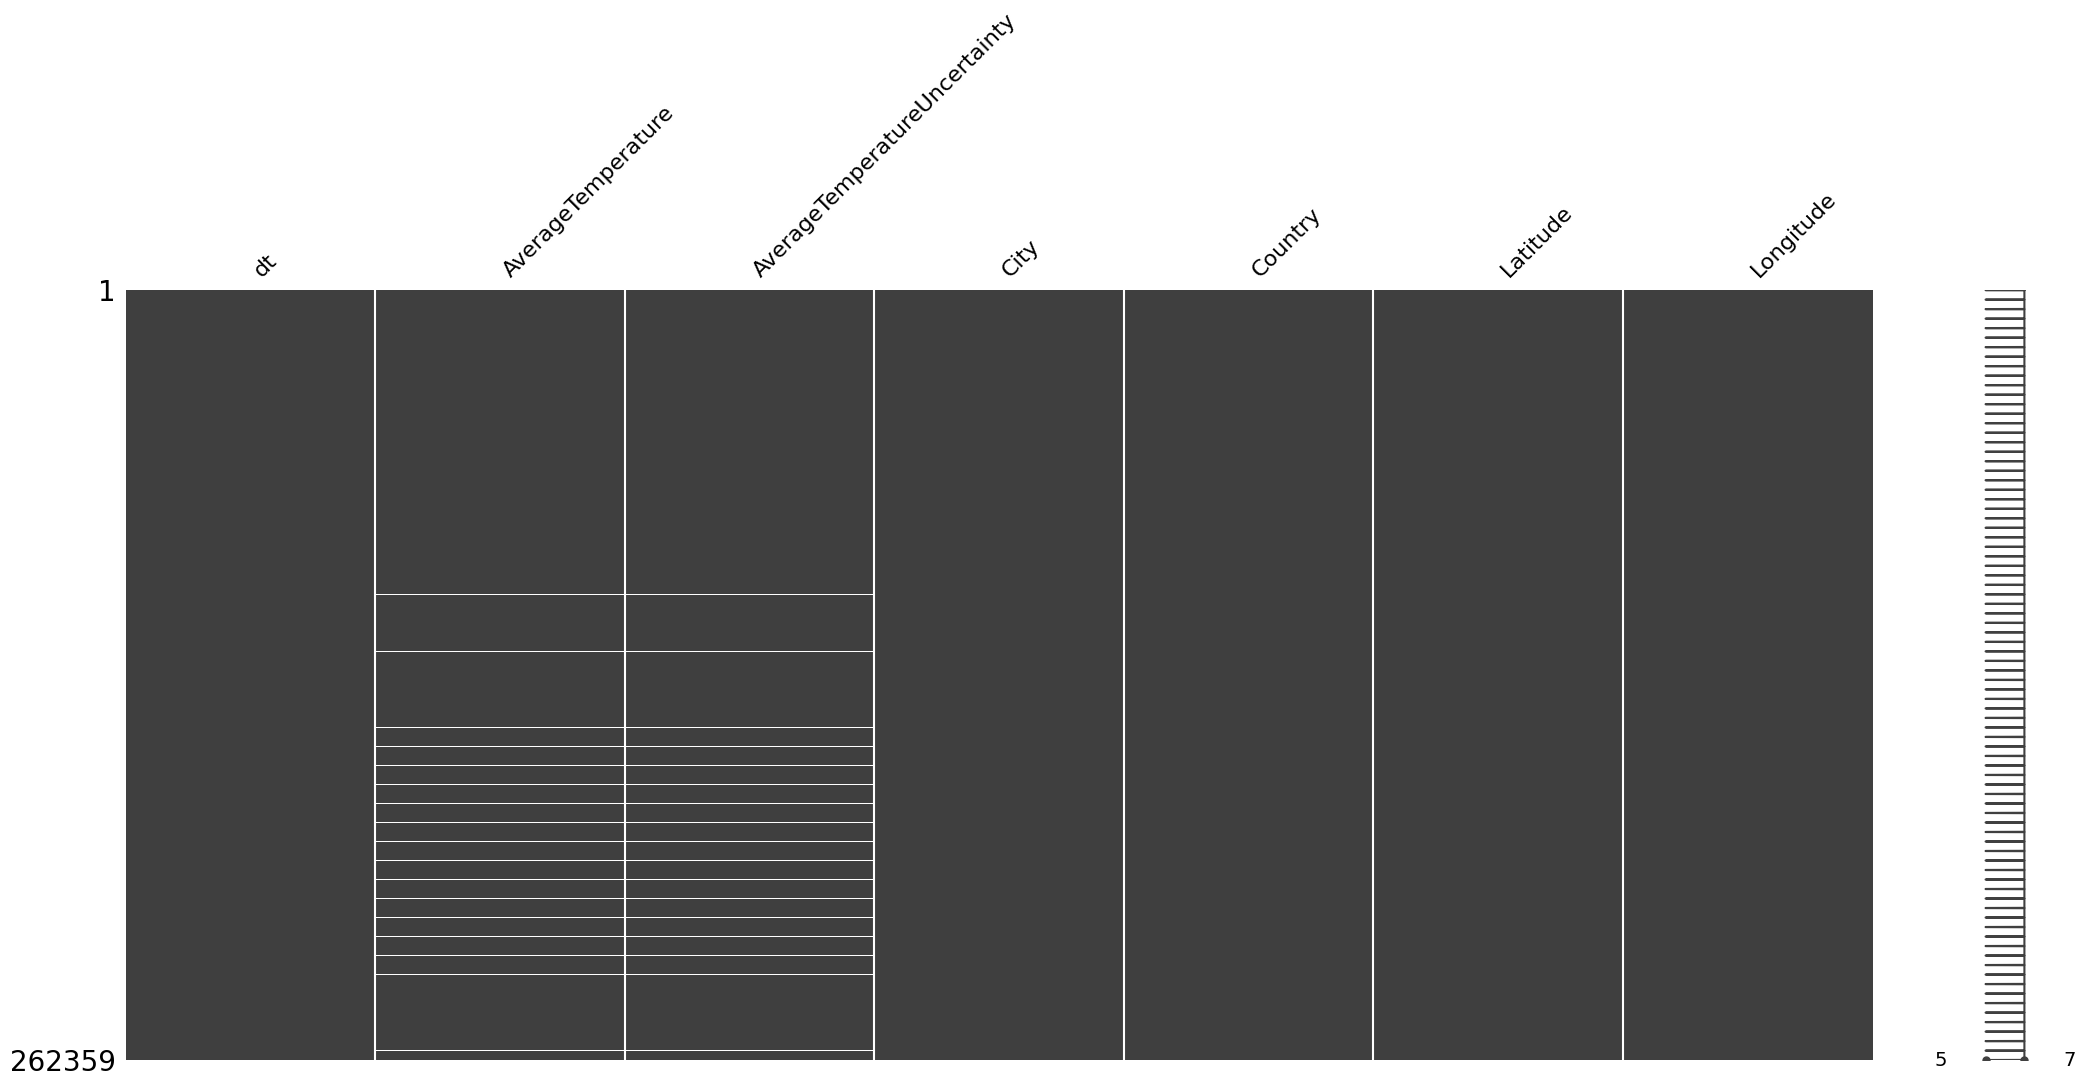

In [5]:
#Visualize missing data
msno.matrix(data_country)
plt.show()

whole code of imputation

C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\2417703668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['dt']).dt.year  # Extract the year
C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\2417703668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['dt']).dt.month  # Extract the month
C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\2417703668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

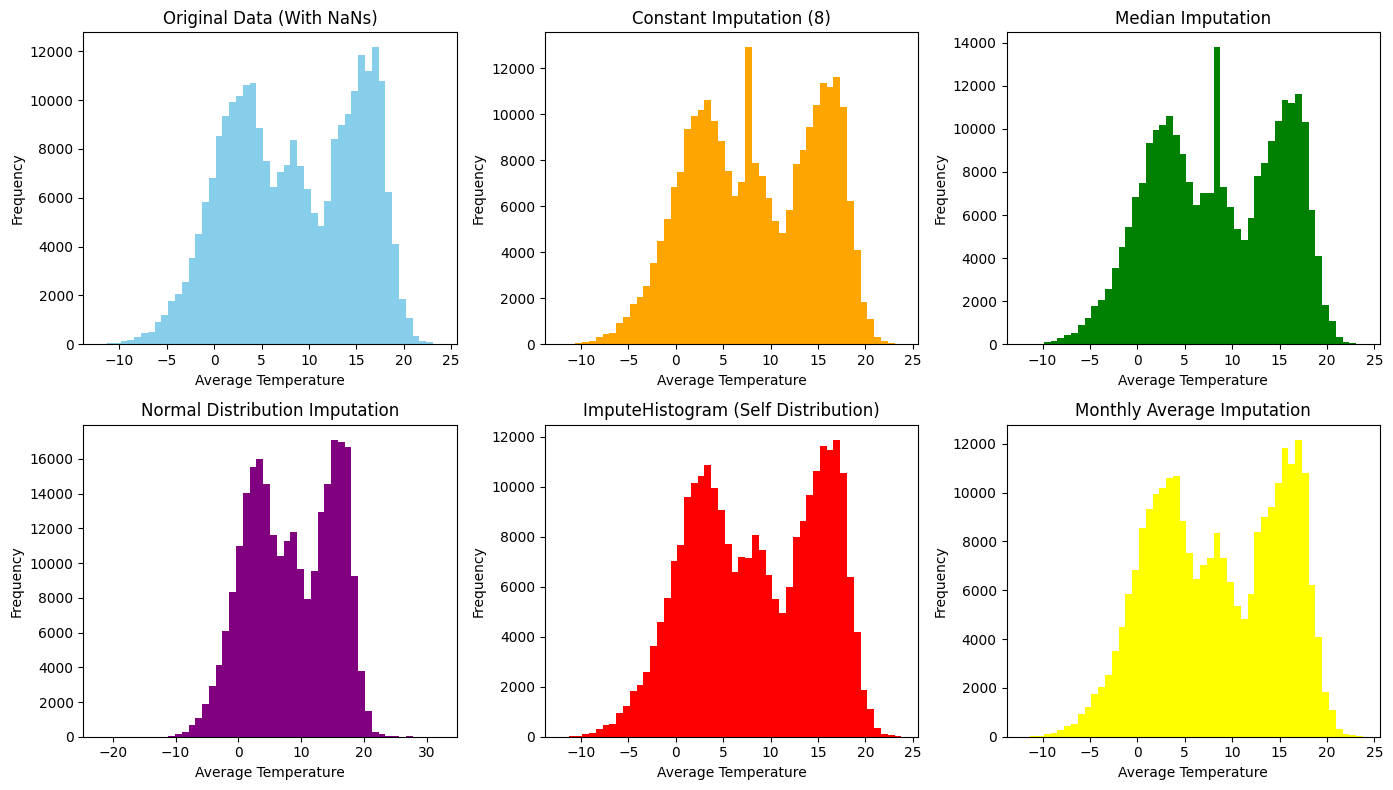

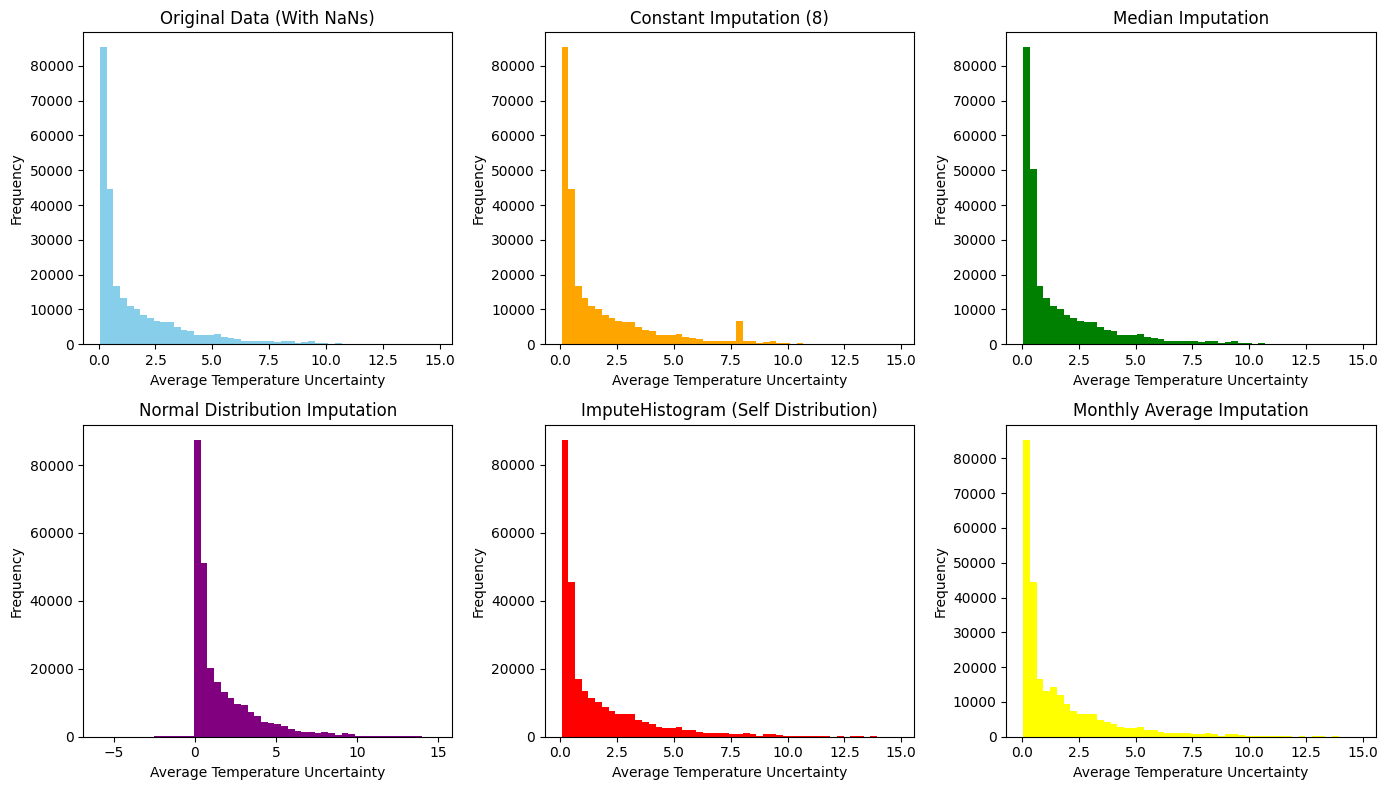

In [6]:
# Function to impute missing values using the average of the same month across years
def impute_missing_values(df, col):
    df['Year'] = pd.to_datetime(df['dt']).dt.year  # Extract the year
    df['Month'] = pd.to_datetime(df['dt']).dt.month  # Extract the month
    
    # Group by 'Month' and calculate the mean of non-missing values for each month
    monthly_means = df.groupby('Month')[col].transform('mean')
    
    # Fill missing values with the corresponding monthly mean
    df[col].fillna(monthly_means, inplace=True)
    
    # Cleanup temporary columns (Year and Month)
    df.drop(['Year', 'Month'], axis=1, inplace=True)

# Load your dataset
data_country #= pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Datasets/GlobalLandTemperaturesByCity.csv', parse_dates=[0])

# Extract relevant columns
temperature_data = data_country['AverageTemperature']
uncertainty_data = data_country['AverageTemperatureUncertainty']

# Impute missing values using various methods for AverageTemperatureUncertainty

# 1. Original Data (with NaNs)
original_temperature_data = temperature_data
original_uncertainty_data = uncertainty_data

# 2. Constant Imputation (Filling NaNs with a constant value of 8)
constant_imputed_temp = temperature_data.fillna(8)
constant_imputed_uncertainty = uncertainty_data.fillna(8)

# 3. Median Imputation (Filling NaNs with the median of the column)
median_imputed_temp = temperature_data.fillna(temperature_data.median())
median_imputed_uncertainty = uncertainty_data.fillna(uncertainty_data.median())

# 4. Normal Distribution Imputation (Filling NaNs with random values from a normal distribution)
normal_imputed_temp = temperature_data.copy()
normal_imputed_temp[normal_imputed_temp.isna()] = np.random.normal(
    temperature_data.mean(), temperature_data.std(), size=normal_imputed_temp.isna().sum()
)

normal_imputed_uncertainty = uncertainty_data.copy()
normal_imputed_uncertainty[normal_imputed_uncertainty.isna()] = np.random.normal(
    uncertainty_data.mean(), uncertainty_data.std(), size=normal_imputed_uncertainty.isna().sum()
)

# 5. Impute Histogram (Self Distribution) (Filling NaNs with random values sampled from non-NaN values)
impute_hist_temp = temperature_data.copy()
impute_hist_temp[impute_hist_temp.isna()] = np.random.choice(temperature_data.dropna(), size=impute_hist_temp.isna().sum())

impute_hist_uncertainty = uncertainty_data.copy()
impute_hist_uncertainty[impute_hist_uncertainty.isna()] = np.random.choice(uncertainty_data.dropna(), size=impute_hist_uncertainty.isna().sum())

# 6. Interpolation-based Imputation (Filling NaNs with the monthly average across years)
impute_missing_values(data_country, 'AverageTemperature')
impute_missing_values(data_country, 'AverageTemperatureUncertainty')

interpolated_imputed_temp = data_country['AverageTemperature']
interpolated_imputed_uncertainty = data_country['AverageTemperatureUncertainty']

# Plotting all distributions for different imputation methods for AverageTemperature
plt.figure(figsize=(14, 8))

# Plot 1: Original data (with NaNs) for AverageTemperature
plt.subplot(2, 3, 1)
original_temperature_data.plot(kind='hist', bins=50, title='Original Data (With NaNs)', color='skyblue')
plt.xlabel('Average Temperature')

# Plot 2: Constant Imputation for AverageTemperature
plt.subplot(2, 3, 2)
constant_imputed_temp.plot(kind='hist', bins=50, title='Constant Imputation (8)', color='orange')
plt.xlabel('Average Temperature')

# Plot 3: Median Imputation for AverageTemperature
plt.subplot(2, 3, 3)
median_imputed_temp.plot(kind='hist', bins=50, title='Median Imputation', color='green')
plt.xlabel('Average Temperature')

# Plot 4: Normal Distribution Imputation for AverageTemperature
plt.subplot(2, 3, 4)
normal_imputed_temp.plot(kind='hist', bins=50, title='Normal Distribution Imputation', color='purple')
plt.xlabel('Average Temperature')

# Plot 5: Impute Histogram (Self Distribution) for AverageTemperature
plt.subplot(2, 3, 5)
impute_hist_temp.plot(kind='hist', bins=50, title='ImputeHistogram (Self Distribution)', color='red')
plt.xlabel('Average Temperature')

# Plot 6: Interpolation Imputation (monthly average across years) for AverageTemperature
plt.subplot(2, 3, 6)
interpolated_imputed_temp.plot(kind='hist', bins=50, title='Monthly Average Imputation', color='yellow')
plt.xlabel('Average Temperature')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Plotting all distributions for different imputation methods for AverageTemperatureUncertainty
plt.figure(figsize=(14, 8))

# Plot 1: Original data (with NaNs) for AverageTemperatureUncertainty
plt.subplot(2, 3, 1)
original_uncertainty_data.plot(kind='hist', bins=50, title='Original Data (With NaNs)', color='skyblue')
plt.xlabel('Average Temperature Uncertainty')

# Plot 2: Constant Imputation for AverageTemperatureUncertainty
plt.subplot(2, 3, 2)
constant_imputed_uncertainty.plot(kind='hist', bins=50, title='Constant Imputation (8)', color='orange')
plt.xlabel('Average Temperature Uncertainty')

# Plot 3: Median Imputation for AverageTemperatureUncertainty
plt.subplot(2, 3, 3)
median_imputed_uncertainty.plot(kind='hist', bins=50, title='Median Imputation', color='green')
plt.xlabel('Average Temperature Uncertainty')

# Plot 4: Normal Distribution Imputation for AverageTemperatureUncertainty
plt.subplot(2, 3, 4)
normal_imputed_uncertainty.plot(kind='hist', bins=50, title='Normal Distribution Imputation', color='purple')
plt.xlabel('Average Temperature Uncertainty')

# Plot 5: Impute Histogram (Self Distribution) for AverageTemperatureUncertainty
plt.subplot(2, 3, 5)
impute_hist_uncertainty.plot(kind='hist', bins=50, title='ImputeHistogram (Self Distribution)', color='red')
plt.xlabel('Average Temperature Uncertainty')

# Plot 6: Interpolation Imputation (monthly average across years) for AverageTemperatureUncertainty
plt.subplot(2, 3, 6)
interpolated_imputed_uncertainty.plot(kind='hist', bins=50, title='Monthly Average Imputation', color='yellow')
plt.xlabel('Average Temperature Uncertainty')

# Adjust layout and show
plt.tight_layout()
plt.show()


means of both

In [7]:
# Original Data (with NaNs)
mean_original_temp = original_temperature_data.mean()
mean_original_uncertainty = original_uncertainty_data.mean()

# Constant Imputation
mean_constant_temp = constant_imputed_temp.mean()
mean_constant_uncertainty = constant_imputed_uncertainty.mean()

# Median Imputation
mean_median_temp = median_imputed_temp.mean()
mean_median_uncertainty = median_imputed_uncertainty.mean()

# Normal Distribution Imputation
mean_normal_temp = normal_imputed_temp.mean()
mean_normal_uncertainty = normal_imputed_uncertainty.mean()

# Self Distribution Imputation
mean_impute_hist_temp = impute_hist_temp.mean()
mean_impute_hist_uncertainty = impute_hist_uncertainty.mean()

# Interpolation-based Imputation
mean_interpolated_temp = interpolated_imputed_temp.mean()
mean_interpolated_uncertainty = interpolated_imputed_uncertainty.mean()

# Print all means
print(f"Mean of Original AverageTemperature: {mean_original_temp}")
print(f"Mean after Constant Imputation (AverageTemperature): {mean_constant_temp}")
print(f"Mean after Median Imputation (AverageTemperature): {mean_median_temp}")
print(f"Mean after Normal Distribution Imputation (AverageTemperature): {mean_normal_temp}")
print(f"Mean after Self Distribution Imputation (AverageTemperature): {mean_impute_hist_temp}")
print(f"Mean after Interpolation Imputation (AverageTemperature): {mean_interpolated_temp}")

print("\n")
print("-------------------------------------------")
print("\n")
print(f"Mean of Original AverageTemperatureUncertainty: {mean_original_uncertainty}")
print(f"Mean after Constant Imputation (AverageTemperatureUncertainty): {mean_constant_uncertainty}")
print(f"Mean after Median Imputation (AverageTemperatureUncertainty): {mean_median_uncertainty}")
print(f"Mean after Normal Distribution Imputation (AverageTemperatureUncertainty): {mean_normal_uncertainty}")
print(f"Mean after Self Distribution Imputation (AverageTemperatureUncertainty): {mean_impute_hist_uncertainty}")
print(f"Mean after Interpolation Imputation (AverageTemperatureUncertainty): {mean_interpolated_uncertainty}")


Mean of Original AverageTemperature: 8.489330695208247
Mean after Constant Imputation (AverageTemperature): 8.471909738183179
Mean after Median Imputation (AverageTemperature): 8.480338882980956
Mean after Normal Distribution Imputation (AverageTemperature): 8.481864268354967
Mean after Self Distribution Imputation (AverageTemperature): 8.481869278355232
Mean after Interpolation Imputation (AverageTemperature): 8.489330695208247


-------------------------------------------


Mean of Original AverageTemperatureUncertainty: 1.6147039376710886
Mean after Constant Imputation (AverageTemperatureUncertainty): 1.7586145929813728
Mean after Median Imputation (AverageTemperatureUncertainty): 1.5924432437995268
Mean after Normal Distribution Imputation (AverageTemperatureUncertainty): 1.6141342162748031
Mean after Self Distribution Imputation (AverageTemperatureUncertainty): 1.6146801558170294
Mean after Interpolation Imputation (AverageTemperatureUncertainty): 1.614471673347589


KS Test

In [8]:
# Function to run KS-test and store results
def run_ks_test(original, imputed, label):
    ks_stat, p_value = ks_2samp(original.dropna(), imputed)
    return {
        "Method": label,
        "KS Statistic": ks_stat,
        "P-Value": p_value,
        "Significant (alpha=0.05)": p_value < 0.05
    }

# Perform KS-tests for AverageTemperature
ks_results_temp = [
    run_ks_test(original_temperature_data, constant_imputed_temp, "Constant Imputation"),
    run_ks_test(original_temperature_data, median_imputed_temp, "Median Imputation"),
    run_ks_test(original_temperature_data, normal_imputed_temp, "Normal Distribution Imputation"),
    run_ks_test(original_temperature_data, impute_hist_temp, "Self Distribution Imputation"),
    run_ks_test(original_temperature_data, interpolated_imputed_temp, "Interpolation Imputation"),
]

# Perform KS-tests for AverageTemperatureUncertainty
ks_results_uncertainty = [
    run_ks_test(original_uncertainty_data, constant_imputed_uncertainty, "Constant Imputation"),
    run_ks_test(original_uncertainty_data, median_imputed_uncertainty, "Median Imputation"),
    run_ks_test(original_uncertainty_data, normal_imputed_uncertainty, "Normal Distribution Imputation"),
    run_ks_test(original_uncertainty_data, impute_hist_uncertainty, "Self Distribution Imputation"),
    run_ks_test(original_uncertainty_data, interpolated_imputed_uncertainty, "Interpolation Imputation"),
]

# Convert results to DataFrame for display
ks_results_temp_df = pd.DataFrame(ks_results_temp)
ks_results_uncertainty_df = pd.DataFrame(ks_results_uncertainty)

# Display the results
print("KS-Test Results for AverageTemperature:")
print(ks_results_temp_df)
print("\nKS-Test Results for AverageTemperatureUncertainty:")
print(ks_results_uncertainty_df)


KS-Test Results for AverageTemperature:
                           Method  KS Statistic       P-Value  \
0             Constant Imputation      0.012041  5.995567e-17   
1               Median Imputation      0.012041  5.995567e-17   
2  Normal Distribution Imputation      0.004151  2.171246e-02   
3    Self Distribution Imputation      0.002375  4.494880e-01   
4        Interpolation Imputation      0.000000  1.000000e+00   

   Significant (alpha=0.05)  
0                      True  
1                      True  
2                      True  
3                     False  
4                     False  

KS-Test Results for AverageTemperatureUncertainty:
                           Method  KS Statistic       P-Value  \
0             Constant Imputation      0.022025  4.404279e-55   
1               Median Imputation      0.011261  1.028824e-14   
2  Normal Distribution Imputation      0.005287  1.417033e-03   
3    Self Distribution Imputation      0.000143  1.000000e+00   
4        Int

saving new dataset

In [9]:
# Impute AverageTemperature with monthly average across years
data_country['Year'] = pd.to_datetime(data_country['dt']).dt.year
data_country['Month'] = pd.to_datetime(data_country['dt']).dt.month
data_country['AverageTemperature'] = data_country['AverageTemperature'].fillna(
    data_country.groupby('Month')['AverageTemperature'].transform('mean')
)
data_country.drop(['Year', 'Month'], axis=1, inplace=True)

# Impute AverageTemperatureUncertainty with Self Distribution Imputation
data_country['AverageTemperatureUncertainty'] = data_country['AverageTemperatureUncertainty'].copy()
data_country['AverageTemperatureUncertainty'][data_country['AverageTemperatureUncertainty'].isna()] = \
    np.random.choice(data_country['AverageTemperatureUncertainty'].dropna(), 
                     size=data_country['AverageTemperatureUncertainty'].isna().sum())

# Save the imputed dataset to a CSV file
output_path = "imputed_deu_data.csv"
data_country.to_csv(output_path, index=False, float_format='%.3f')


C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\556435166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Year'] = pd.to_datetime(data_country['dt']).dt.year
C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\556435166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['Month'] = pd.to_datetime(data_country['dt']).dt.month
C:\Users\a0095989\AppData\Local\Temp\ipykernel_10248\556435166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 